In [2]:
# here we will impor the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline


from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split, GridSearchCV  # to split the data into two parts
from sklearn.model_selection import KFold, cross_val_score  # use for K- fold cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score,average_precision_score, precision_score, confusion_matrix, classification_report

In [3]:
from sklearn.model_selection import GridSearchCV# for tuning parameter
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score


from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

In [52]:
# Loading the Train and Test Sets

train = pd.read_csv('train (1).csv')
test  = pd.read_csv('test (2).csv')
full_data = [train, test]
print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
None


In [8]:
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


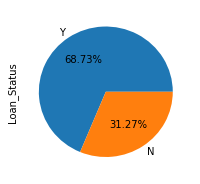

In [39]:
# Quick Visualization of The Target Variable

plt.figure(figsize=(3,3))
pd.Series(train['Loan_Status']).value_counts().plot(kind ='pie', autopct='%1.2f%%')

In [12]:
print('This dataset contains ',train.shape[0],'rows')
print('This dataset contains ',train.shape[1],'columns')

('This dataset contains ', 614, 'rows')
('This dataset contains ', 13, 'columns')


In [16]:
# Check the data types of the Columns

train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [17]:
# Do figure out how to Convert the Datatypes of the Catgeorical Columns from Object to Category type


In [ ]:
# Confirm if the Catgeorical Columns data type has been converted

train.info()

In [13]:
# Dropping the Loan ID as it seems irrelevant in our case study for modelling

train.drop(['Loan_ID'],inplace=True,axis=1)

In [42]:
# Checking the missing values

missing_df =train.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Column Name', 'Missing Values Count']
missing_df['Filling Factor (%)']=(train.shape[0]-missing_df['Missing Values Count'])/train.shape[0]*100
missing_df.sort_values('Filling Factor (%)').reset_index(drop = True)

,Column Name,Missing Values Count,Filling Factor (%)
0,Credit_History,50,91.856678
1,Self_Employed,32,94.788274
2,LoanAmount,22,96.416938
3,Dependents,15,97.557003
4,Loan_Amount_Term,14,97.719870
5,Gender,13,97.882736
6,Married,3,99.511401
7,Education,0,100.000000
8,ApplicantIncome,0,100.000000
9,CoapplicantIncome,0,100.000000


In [ ]:
## Treat Those Missing Values 

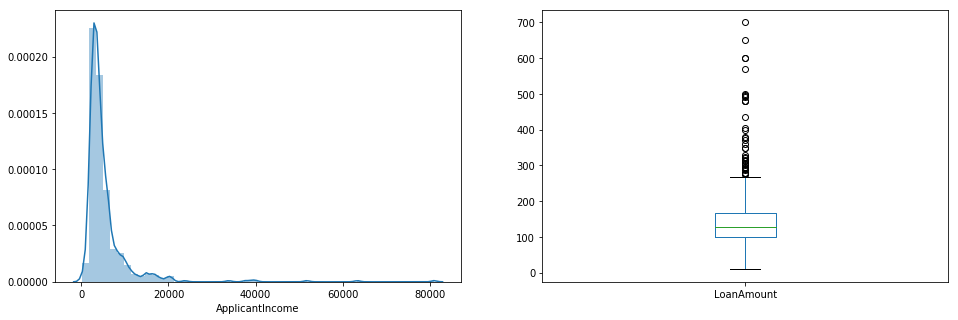

In [11]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

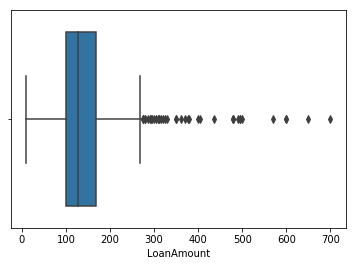

In [19]:
sns.boxplot(train['LoanAmount'])
plt.show()

# Handle these Outliers in the Loan Amount Column

In [20]:
# Having Detected that Our loan Amount Column has Outliers: Seek out to treat the Outliers

# Ensure You do Feature Scaling to Normalize and Standardize  the skewed Disributions on the Numerical Values  (Applicant Income, Loan Amount amd the rest)

In [ ]:
# Decoding the  Categorical Variables

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

L_en = LabelEncoder()
O_en = OneHotEncoder(sparse=False)

one_hot_categories = ['Gender','Education','gender_of_respondent','Self_Employed','Property_Area'] #attributes to convert to 1hot

for category in one_hot_categories: #iterate over attributes
    out1 = L_en.fit_transform(train[[category]].values.ravel())    
    out2 = O_en.fit_transform(out1.reshape(-1,1)).astype('int')

    for i, name in enumerate(L_en.classes_):
            dataset[name] = out2[:,i] # make new column filled with 0s, 1s

dataset.drop(one_hot_categories , axis=1, inplace=True) #drop original colsdf


### Univariate Analysis of some of the Categorical Data

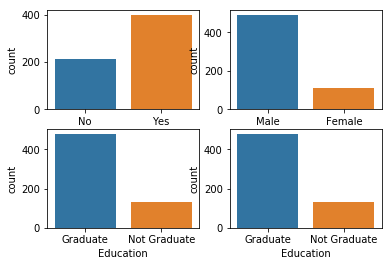

In [34]:

cat_names=['Married', 'Gender', 'Education', 'Education']

i=0
for name in cat_names:
    i=i+1
    plt.subplot(2,2,i)
    sns.countplot(name,data=train) 
    
plt.show()

####  Quick Univariate analysis for Continuous Features 

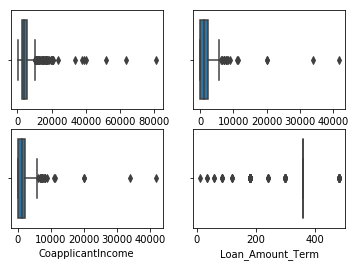

In [30]:
cont_names=['ApplicantIncome','CoapplicantIncome','CoapplicantIncome','Loan_Amount_Term']

        
#sns.boxplot(dataset['season'])   
i=0
for name in cont_names:
    i=i+1
    plt.subplot(2,2,i)
    sns.boxplot(name,data=train) 
    
plt.show()

In [ ]:
# Spend Great deal of your time Transforming and Engineering New Features, Exploratory Data Analysis (Univariate, Multivariate and Bivariate Analysis)


In [54]:
# Convert to Binary  the target to help later with  Modelling and Plots Visualizations 

train['Loan_Status'] = train['Loan_Status'].map({'Y':1, 'N':0})

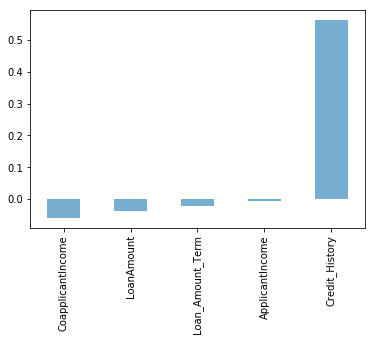

In [56]:
# Observe the Correlation to the Target Variable

tst = train.corr()['Loan_Status'].copy()
tst = tst.drop('Loan_Status')
tst.sort_values(inplace=True)
tst.plot(kind='bar', alpha=0.6)

In [ ]:
##Check out pearson Correlations and Visualize the Correlation Heatmaps

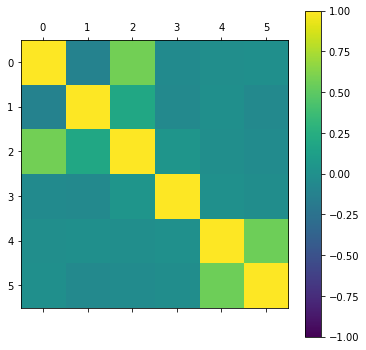

In [57]:
# Pandas Scatter Matrix

from pandas.plotting import scatter_matrix

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cax = ax.matshow(train.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

In [58]:
## Know how to Intepret Pandas Scatter Matrix

### Spend Great Deal of your time Cleaning the Dataset, Handle the Outliers, Scale the Numerical Values, Exploratory Data Analysis before I introduce you to Feature Construction, Extraction and Feature Selection Techniques and Later the Modelling Process